#  MSCA 37011 - Deep Learning and Image Recognition

## MNIST classification using Support Vector Machines 

https://en.wikipedia.org/wiki/MNIST_database

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, datasets, metrics
%matplotlib inline 

### Low Resolution MNIST Images from Scikit Learn

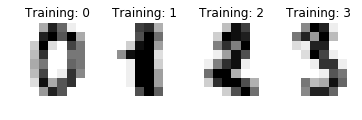

In [2]:
# The digits dataset is a low-res 8x8 images of digits
digits = datasets.load_digits()

# Display the first few images, stored in the `images` attribute of the
# dataset. The target field gives the digit they represent
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

plt.show()

In [3]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
digits.images = digits.images.reshape((n_samples, -1))

### Split data into train and test

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.images, digits.target, test_size=0.3, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
expected = y_test
y_train

(1257, 64) (1257,)
(540, 64) (540,)


array([9, 3, 6, ..., 7, 7, 8])

### Fit Model and Plot Confusion Matrix

In [5]:
#Fit classifier on training data and predict on test
def fit_predict_score(name,clf):
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    confusion_matrix =  pd.crosstab(index=y_test, columns=predicted.ravel(), rownames=['Expected'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    accuracy = np.round(metrics.accuracy_score(expected , predicted),3)
    plt.title(name + ", Accuracy: " + str(accuracy), fontsize = 15)
    plt.show()
    print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

### Train SVM Classifier

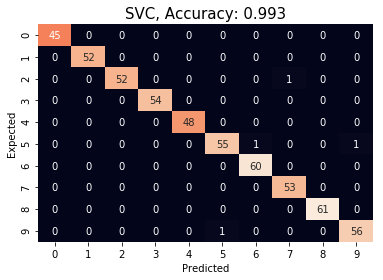

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        52
           2       1.00      0.98      0.99        53
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00        48
           5       0.98      0.96      0.97        57
           6       0.98      1.00      0.99        60
           7       0.98      1.00      0.99        53
           8       1.00      1.00      1.00        61
           9       0.98      0.98      0.98        57

   micro avg       0.99      0.99      0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99 

In [6]:
# classifier ? 
from sklearn import svm
classifier = svm.SVC(gamma=0.001)
fit_predict_score ("SVC", classifier)

### Predict and Display Results

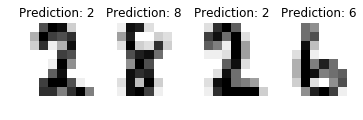

In [7]:
# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)
X_test = X_test.reshape(len(X_test),8,8)
images_and_predictions = list(zip(X_test, predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
plt.show()

## <span style="color:cornflowerblue">Exercise:</span>

1. What classifier was used above. What do the parameters of the classifier represent ?
2. Try two other classifiers on this data set such as 1) Random Forests 2) Boosting Methods and compare their accuracy scores. 

### Higher Resolution MNIST Images from Keras

The SVM works well for low resolution 8x8 images. Let us increase the dimensionality and use 28x28 MNIST images from Keras. Observe what happens to training time and accuracy score.

In [8]:
from keras.datasets import mnist

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

Using TensorFlow backend.


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


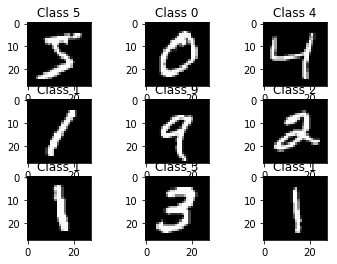

In [9]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [10]:
X_train = X_train.reshape(60000, 784 )
X_test = X_test.reshape(10000, 784 )

#to save time train on 5000 samples
X_train = X_train [0:5000]
y_train  = y_train [0:5000]

X_test = X_test[0:540]
y_test  = y_test [0:540]
expected = y_test


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
y_train

(5000, 784) (5000,)
(540, 784) (540,)


array([5, 0, 4, ..., 2, 1, 2], dtype=uint8)

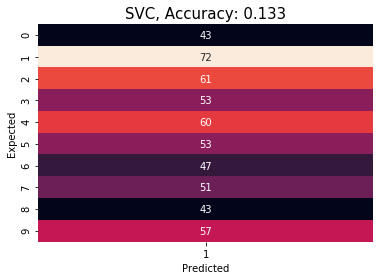

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.13      1.00      0.24        72
           2       0.00      0.00      0.00        61
           3       0.00      0.00      0.00        53
           4       0.00      0.00      0.00        60
           5       0.00      0.00      0.00        53
           6       0.00      0.00      0.00        47
           7       0.00      0.00      0.00        51
           8       0.00      0.00      0.00        43
           9       0.00      0.00      0.00        57

   micro avg       0.13      0.13      0.13       540
   macro avg       0.01      0.10      0.02       540
weighted avg       0.02      0.13 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
# classifier ? 
from sklearn import svm
classifier = svm.SVC(gamma=0.001)
fit_predict_score ("SVC", classifier)

<font color="red">Exercise: Improve the score of the SVM by fine tuning the parameters</font>

poly kernel ~ 94% accuracy